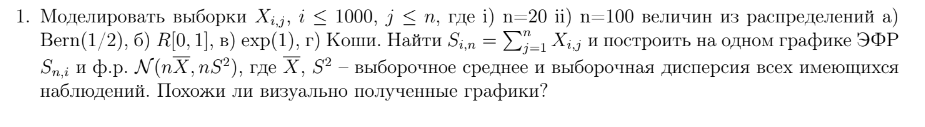

# 1

 5


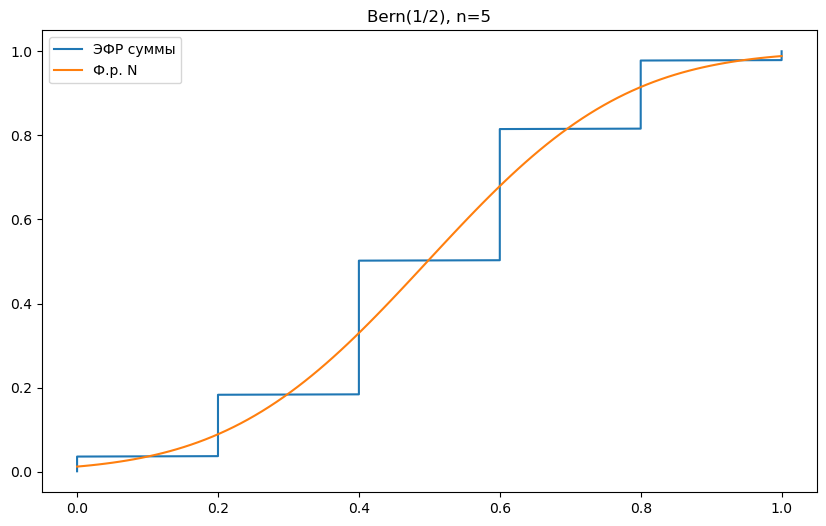

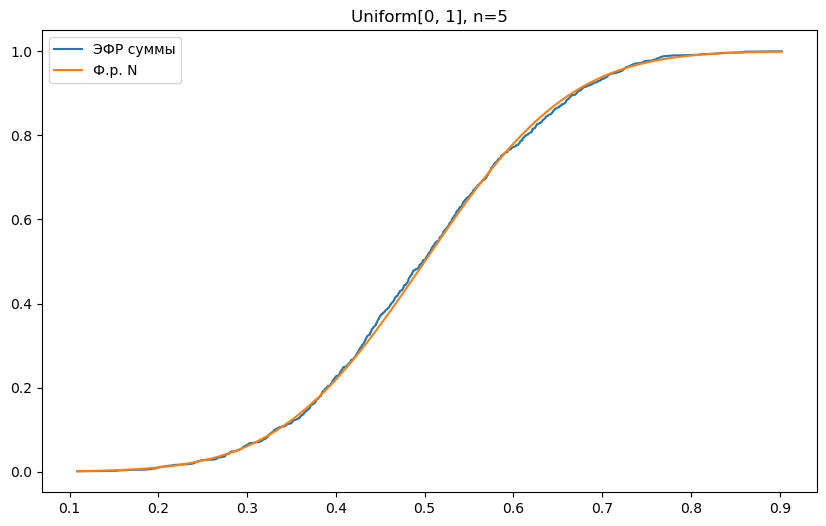

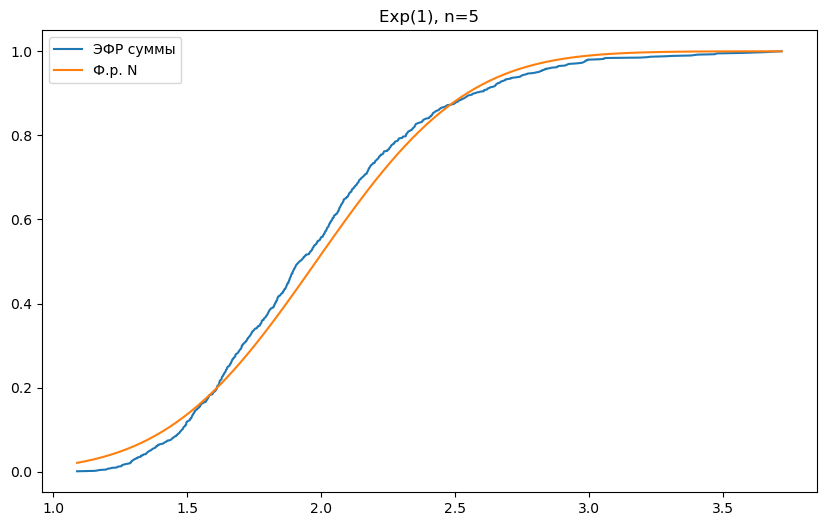

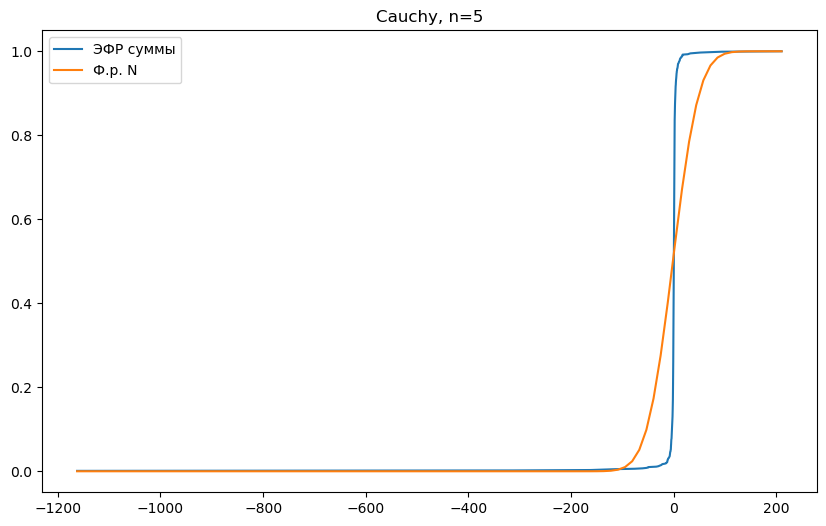

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, uniform, expon, cauchy, norm

def empirical_cdf(data):
    x_sorted = np.sort(data)
    n = len(data)
    y = np.arange(1, n + 1) / n
    return x_sorted, y

def plotplot(n, distribution, title):
    plt.figure(figsize=(10, 6))

    data = distribution.rvs(size=(1000, n))

    means = np.mean(data, axis=1)
    variance = np.var(data, axis=1)

    x_ecdf, y_ecdf = empirical_cdf(means)
    plt.plot(x_ecdf, y_ecdf, label='ЭФР суммы')

    x_normal = np.linspace(np.min(means), np.max(means), 100)
    y_normal = norm.cdf(x_normal, loc=np.mean(means), scale=np.sqrt(np.var(means)))
    plt.plot(x_normal, y_normal, label='Ф.р. N')

    plt.title(title)
    plt.legend()
    plt.show()


n = int(input())
plotplot(n, bernoulli(0.5), f'Bern(1/2), n={n}')
plotplot(n, uniform(0, 1), f'Uniform[0, 1], n={n}')
plotplot(n, expon(1), f'Exp(1), n={n}')
plotplot(n, cauchy(), f'Cauchy, n={n}')

    

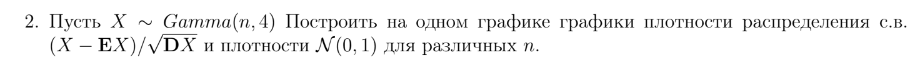

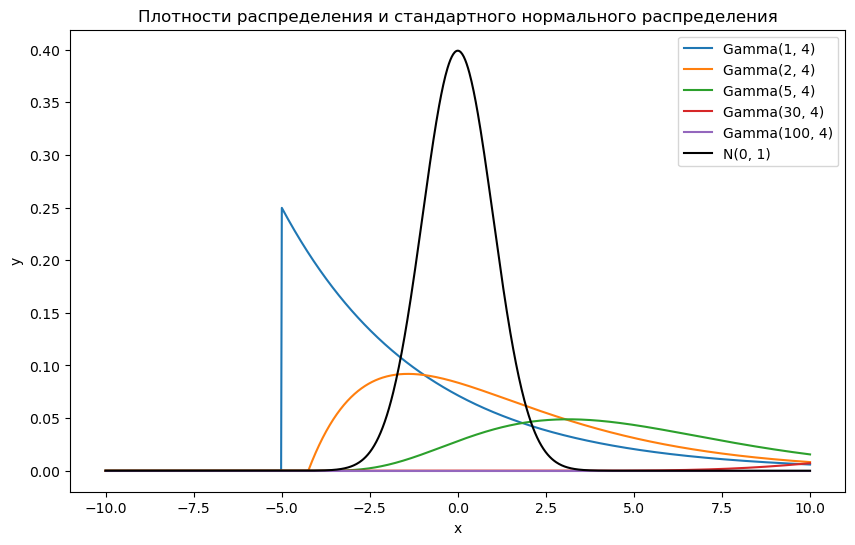

In [14]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, norm

scale_parameter = 4
n_values = [1, 2, 5, 30, 100]

x = np.linspace(-10, 10, 1000)

plt.figure(figsize=(10, 6))

for n in n_values:
    mean = gamma.mean(n, scale_parameter)
    variance = gamma.std(n, scale_parameter)

    #standardized_x = (x - mean) / np.sqrt(variance)

    density = gamma.pdf(mean + (variance * x), n, scale=scale_parameter)
    
    plt.plot(x, density, label=f'Gamma({n}, 4)')

normalno = norm.pdf(x, loc=0, scale=1)
plt.plot(x, normalno, label='N(0, 1)', c='black')

plt.title('Плотности распределения и стандартного нормального распределения')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


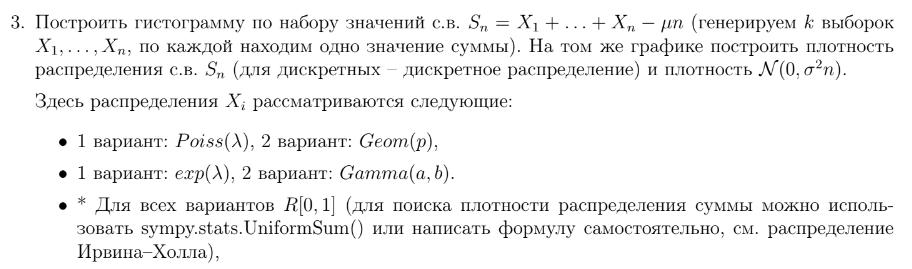

# 3-1)

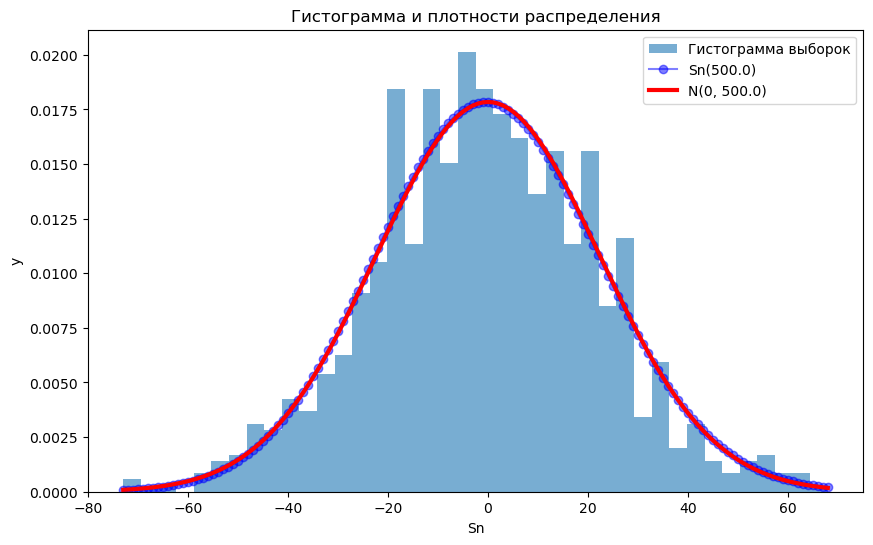

In [24]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, norm
import math

lambda_parameter = 10

# Параметры эксперимента
n = 50  # размер выборки
k = 1000  # из выборок

samples = np.random.poisson(lambda_parameter, size=(k, n))# генерирую матрицу значений Пуассона

sums = np.sum(samples, axis=1) #суммирую, чтобы получить массив значений Sn

mu_n = poisson.mean(lambda_parameter) * n
sigma_n = poisson.var(lambda_parameter) * n

plt.figure(figsize=(10, 6))
plt.hist(sums-mu_n, bins=40, density=1, alpha=0.6, label='Гистограмма выборок')

x = np.arange(min(sums-mu_n), max(sums-mu_n) + 1)
pmf_sn = poisson.pmf(x+mu_n, mu_n)# mu_n, т.к. у нас теперь не X = Poisson, а X1 + ... + Xn
plt.plot(x, pmf_sn, 'o-', c = 'b', alpha =0.5, label=f'Sn({mu_n})')

pdf_normal = norm.pdf(x, loc=0, scale=np.sqrt(sigma_n))
plt.plot(x, pdf_normal, '-', linewidth =3, c = 'r', label=f'N(0, {sigma_n})')

plt.title('Гистограмма и плотности распределения')
plt.xlabel('Sn')
plt.ylabel('y')
plt.legend()
plt.show()


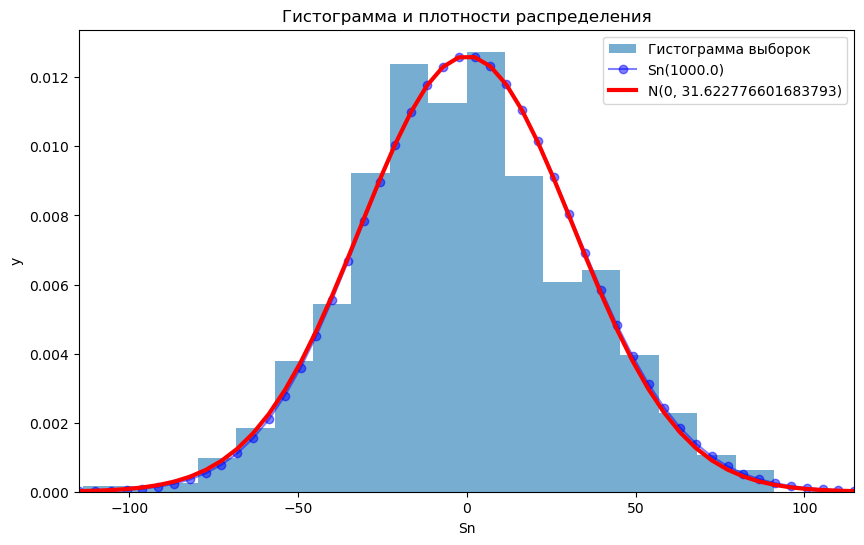

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, norm, gamma
import math

lamb = 1

# Параметры эксперимента
n = 1000  # размер выборки
k = 1000  # из выборок

samples = np.random.exponential(lamb, size=(k, n))

sums = np.sum(samples, axis=1)

mu_n = n*(1/lamb)
sigma_n = math.sqrt(n/(lamb**2))

plt.figure(figsize=(10, 6))
plt.hist(sums - mu_n, bins=20, density=1, alpha=0.6, label='Гистограмма выборок')

x = np.linspace(min(sums- mu_n) - 1, max(sums- mu_n) + 1)
pmf_sn = gamma.pdf(x+mu_n, n, 1/lamb)
plt.plot(x, pmf_sn, 'o-', c = 'b', alpha =0.5, label=f'Sn({mu_n})')

pdf_normal = norm.pdf(x, loc=0, scale=sigma_n)
plt.plot(x, pdf_normal, '-', linewidth =3, c = 'r', label=f'N(0, {sigma_n})')

plt.xlim(min(sums- mu_n) - 1,max(sums- mu_n) + 1)
plt.title('Гистограмма и плотности распределения')
plt.xlabel('Sn')
plt.ylabel('y')
plt.legend()
plt.show()

# 3-3)

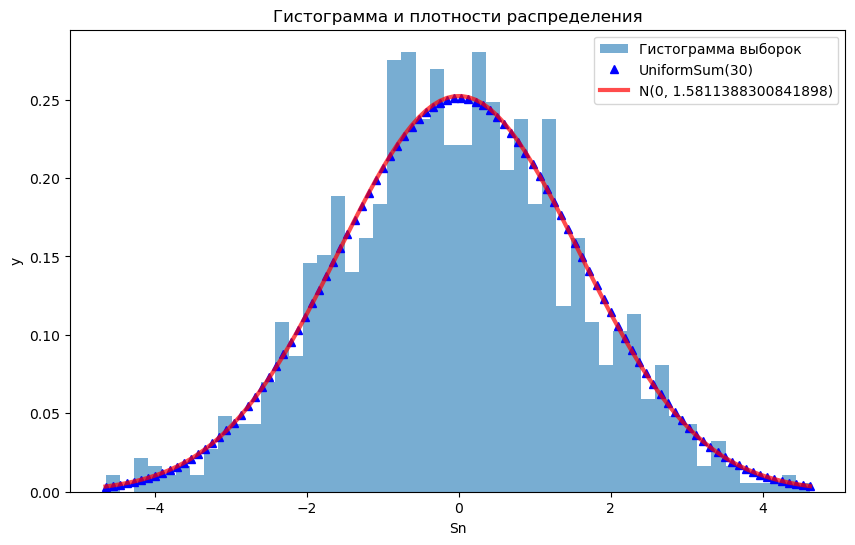

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, norm, uniform
import math
from sympy.stats import Uniform, UniformSum, density 
from sympy import Symbol

n = 30
k = 1000

samples = np.random.uniform(0, 1, size=(k, n))
sums = np.sum(samples, axis=1)
mu_n = n * uniform(0,1).mean()
sigma_n = math.sqrt(n/12)
plt.figure(figsize=(10, 6))
plt.hist(sums-mu_n, bins=50, density=1, alpha=0.6, label='Гистограмма выборок')

y = np.linspace(min(sums)-mu_n, max(sums)-mu_n, 100)
X = UniformSum("x", n)
pdf_values = [density(X)(z) for z in y+mu_n]
plt.plot(y, pdf_values, '^', label=f'UniformSum({n})', color='blue')

pdf_normal = norm.pdf(y, loc=0, scale=sigma_n)
plt.plot(y, pdf_normal, '-', alpha=0.7, linewidth =3, c = 'r', label=f'N(0, {sigma_n})')

plt.title('Гистограмма и плотности распределения')
plt.xlabel('Sn')
plt.ylabel('y')
plt.legend()
plt.show()

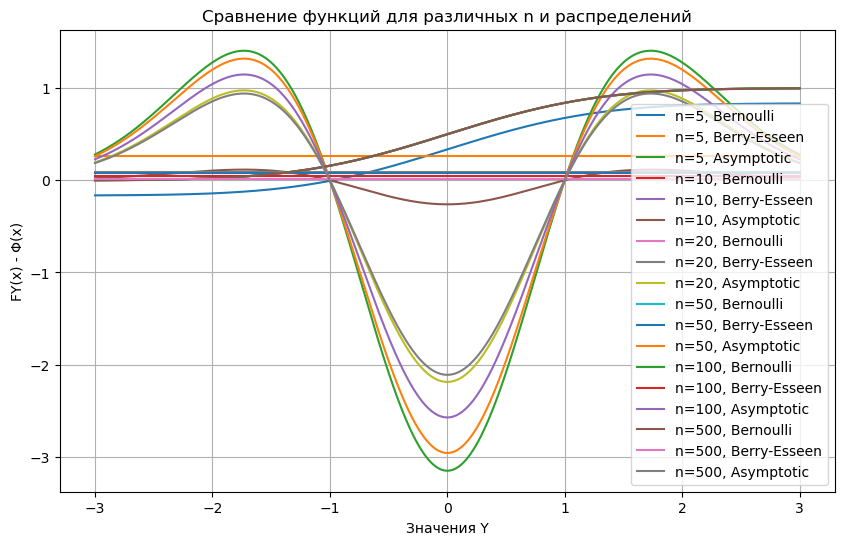

In [7]:
# OLD

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, bernoulli, expon

def Y(n, X, mu, sigma):
    Sn = np.sum(X) - n * mu
    return (Sn - n * mu) / (sigma * np.sqrt(n))

def berry_esseen_bound(n, X, mu, sigma):
    C = 0.4784  # константа из неравенства Берри–Эссеена
    third_moment = np.mean((X - mu) ** 3)
    return C * (third_moment / (sigma ** 3)) / np.sqrt(n)

def asymptotic_expansion(n, X, mu, sigma):
    third_moment = np.mean((X - mu) ** 3)
    a3 = third_moment / sigma ** 3
    return a3 * np.sqrt(2 * np.pi * n) * (1 - np.linspace(-3, 3, 1000) ** 2) * np.exp(-0.5 * np.linspace(-3, 3, 1000) ** 2) / np.sqrt(n)

p = 0.3 
lambda_param = 0.5 

sample_sizes = [5, 10, 20, 50, 100, 500]
#sample_sizes = [500]

plt.figure(figsize=(10, 6))

for n in sample_sizes:
    # Генерация выборок
    X_bernoulli = bernoulli.rvs(p, size=n)
    X_exponential = expon.rvs(scale=1 / lambda_param, size=n)

    # Вычисление Y и соответствующих значений функций
    y_values = np.linspace(-3, 3, 1000)
    Y_bernoulli = Y(n, X_bernoulli, p, np.sqrt(p * (1 - p)))
    Y_exponential = Y(n, X_exponential, 1 / lambda_param, 1 / lambda_param)

    berry_esseen_values = berry_esseen_bound(n, X_bernoulli, p, np.sqrt(p * (1 - p))) * np.ones_like(y_values)
    asymptotic_expansion_values = asymptotic_expansion(n, X_bernoulli, p, np.sqrt(p * (1 - p)))
    
    berry_esseen_values = berry_esseen_bound(n, Y_exponential, p, np.sqrt(p * (1 - p))) * np.ones_like(y_values)
    asymptotic_expansion_values = asymptotic_expansion(n, Y_exponential, p, np.sqrt(p * (1 - p)))

    plt.plot(y_values, norm.cdf(y_values) - norm.cdf(Y_bernoulli), label=f'n={n}, Bernoulli')
    plt.plot(y_values, berry_esseen_values, label=f'n={n}, Berry-Esseen')
    plt.plot(y_values, -asymptotic_expansion_values, label=f'n={n}, Asymptotic')

plt.title('Сравнение функций для различных n и распределений')
plt.xlabel('Значения Y')
plt.ylabel('FY(x) - Φ(x)')
plt.legend()
plt.grid(True)
plt.show()


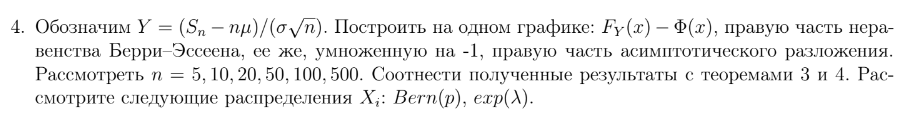

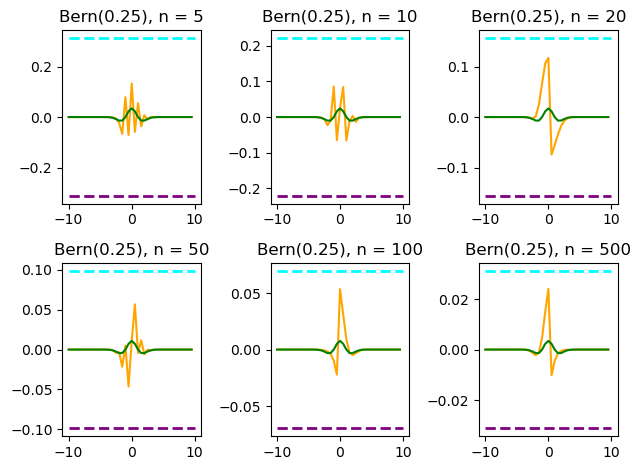

In [6]:
import scipy.stats as sсst
import matplotlib.pyplot as plt
import numpy as np
p = 1/4
def asympt(x, skewness, n):
    return skewness / (6 * np.sqrt(n))*(1-x**2)*sсst.norm.pdf(x)
mu = sсst.bernoulli(p).mean()
sk = sсst.bernoulli(p).stats('s')
r = sсst.bernoulli.rvs(p, size=1000)
fig1, ax = plt.subplots(2,3)
def calculate_n_bern(n, p, ax, i, j):
    Berry_Essen_right = 0.4784 * (np.absolute(r - r.mean())**3).mean() / (np.sqrt(n)*(sсst.bernoulli(p).var()**(3/2)))
    disp = np.sqrt(n*sсst.bernoulli(p).var())
    x_values = np.arange(-10, 10, 0.5)
    y = sсst.binom.cdf(x_values*disp,n,p=p,loc=-mu*n)
    ax[i,j].plot(x_values, y - sсst.norm.cdf(x_values, loc = 0, scale = 1),alpha=1, label = "F_y(x) - Ф(х)", color='orange')
    ax[i,j].hlines(y=Berry_Essen_right, xmin=-10,xmax=10, linestyles='--', label = "BEr",lw=2, color = 'cyan')
    ax[i,j].hlines(y=-Berry_Essen_right, xmin=-10,xmax=10, linestyle='--', label = "-BEr",lw=2, color = 'purple')
    ax[i,j].set_title("Bern(%0.2f), n = %d"%(p,n))
    ax[i,j].plot(x_values, asympt(x_values, sk, n), color = 'green')
calculate_n_bern(5,p,ax,0,0)
calculate_n_bern(10,p,ax,0,1)
calculate_n_bern(20,p,ax,0,2)
calculate_n_bern(50,p,ax,1,0)
calculate_n_bern(100,p,ax,1,1)
calculate_n_bern(500,p,ax,1,2)
plt.tight_layout()
plt.show()

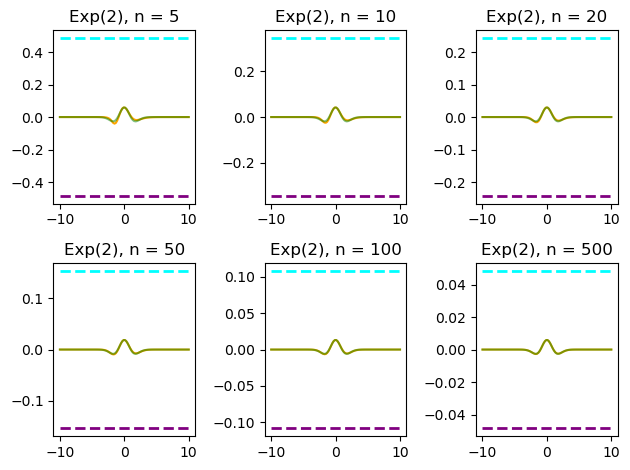

In [9]:
lambda_test = 2
rate = 1/lambda_test
fig2, ax = plt.subplots(2,3)
r = sсst.expon.rvs(scale = rate, size=1000)
def asympt(x, skewness, n):
    return skewness / (6 * np.sqrt(n))*(1-x**2)*sсst.norm.pdf(x)
def calculate_n_exp(n, rate, ax, i, j):
    Berry_Essen_right = 0.4784 * (np.absolute(r - r.mean())**3).mean() / (np.sqrt(n)*(sсst.expon(scale = rate).var()**(3/2)))
    disp = np.sqrt(n*sсst.expon(scale = rate).var())
    x_values = np.linspace(-10, 10, 100)
    y = sсst.gamma.cdf(x_values*disp + rate*n, a = n, scale = rate) #max из этого и нуля
    ax[i,j].plot(x_values,  y - sсst.norm.cdf(x_values, loc = 0, scale = 1), label = "F_y(x) - Ф(х)", color='orange')
    ax[i,j].hlines(y=Berry_Essen_right, xmin=-10,xmax=10, ls='--', label = "BEr",lw=2, color = 'cyan')
    ax[i,j].hlines(y=-Berry_Essen_right, xmin=-10,xmax=10, ls='--', label = "-BEr",lw=2, color = 'purple')
    ax[i,j].set_title("Exp(%d), n = %d"%(lambda_test,n))
    sk = sсst.expon(scale = rate).stats('s')
    ax[i,j].plot(x_values, asympt(x_values, sk, n), alpha = 0.5, color = 'green')
calculate_n_exp(5,rate,ax,0,0)
calculate_n_exp(10,rate,ax,0,1)
calculate_n_exp(20,rate,ax,0,2)
calculate_n_exp(50,rate,ax,1,0)
calculate_n_exp(100,rate,ax,1,1)
calculate_n_exp(500,rate,ax,1,2)
plt.tight_layout()
plt.show()
